**Name : Dhruvi Shah**

**Student ID: 202211032** 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics               
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import mean_absolute_error
from statistics import mean, stdev
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix

#Credit Card Fraud Detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**Preprocessing**

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

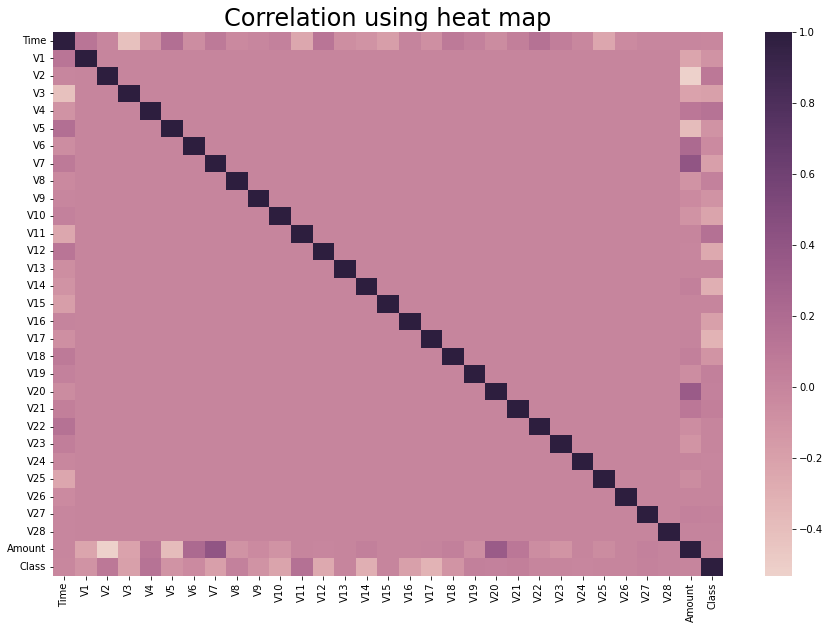

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,cmap=sns.cubehelix_palette(as_cmap=True)) 
sns.set(font_scale=2,style='white')

plt.title('Correlation using heat map')
plt.show()

###**Classification on Imbalanced Dataset** 

In [ ]:
x = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

**Support Vector Machine**

In [ ]:
from sklearn import svm
from sklearn import metrics

svm_model = svm.SVC(kernel='linear')
svm_model.fit(train_x, train_y)

SVC(kernel='linear')

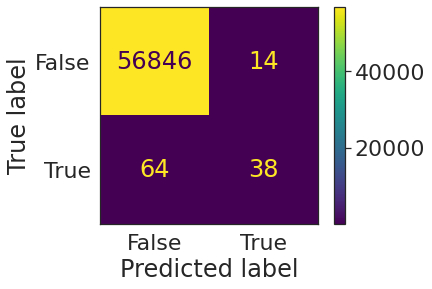

In [ ]:
pred = svm_model.predict(test_x)
confusion_matrix = metrics.confusion_matrix(test_y, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print('Accuracy : ', metrics.accuracy_score(pred , test_y))
print('Precision : ', metrics.precision_score(test_y , pred))
print('Recall : ', metrics.recall_score(test_y , pred))
print('F1 : ', metrics.f1_score(test_y , pred))

Accuracy :  0.9986306660580738
Precision :  0.7307692307692307
Recall :  0.37254901960784315
F1 :  0.49350649350649345


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(train_x, train_y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

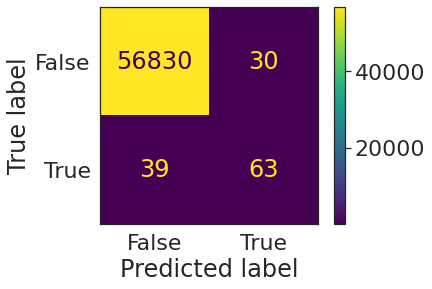

In [ ]:
pred = lr_model.predict(test_x)
confusion_matrix = metrics.confusion_matrix(test_y, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print('Accuracy : ', metrics.accuracy_score(pred , test_y))
print('Precision : ', metrics.precision_score(test_y , pred))
print('Recall : ', metrics.recall_score(test_y , pred))
print('F1 : ', metrics.f1_score(test_y , pred))

Accuracy :  0.9987886661282961
Precision :  0.6774193548387096
Recall :  0.6176470588235294
F1 :  0.6461538461538462


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(train_x, train_y)

RandomForestClassifier()

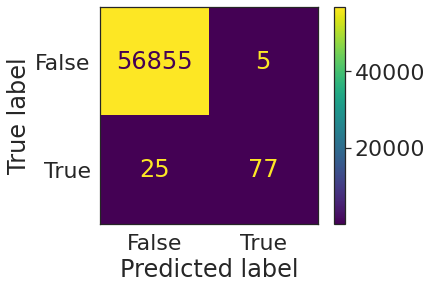

In [ ]:
pred = rf.predict(test_x)
confusion_matrix = metrics.confusion_matrix(test_y, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print('Accuracy : ', metrics.accuracy_score(pred , test_y))
print('Precision : ', metrics.precision_score(test_y , pred))
print('Recall : ', metrics.recall_score(test_y , pred))
print('F1 : ', metrics.f1_score(test_y , pred))

Accuracy :  0.9994733330992591
Precision :  0.9390243902439024
Recall :  0.7549019607843137
F1 :  0.8369565217391305


###**Classification on Randomly Undersampled Dataset**

In [ ]:
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
217096,140759.0,2.052795,-0.044023,-3.861083,-0.537986,3.123352,2.749487,0.152674,0.548438,-0.032329,...,0.044829,0.179096,-0.029343,0.683756,0.404868,0.732484,-0.084226,-0.061707,24.65,0
6774,8528.0,0.447396,2.481954,-5.660814,4.455923,-2.443780,-2.185040,-4.716143,1.249803,-0.718326,...,0.756053,0.140168,0.665411,0.131464,-1.908217,0.334808,0.748534,0.175414,1.00,1
59667,48947.0,-0.714191,0.787651,1.429588,0.289135,0.452926,0.067323,0.383583,0.281824,-0.349637,...,-0.008942,0.129831,-0.246192,-0.047778,0.064942,0.402882,0.086735,0.114058,12.31,0
123201,76845.0,1.141572,1.291195,-1.432900,2.058202,0.940824,-0.958274,0.391154,-0.092519,-0.032829,...,-0.366507,-0.714465,-0.143911,-0.305178,0.697514,-0.312545,0.106247,0.125060,1.00,1
42936,41305.0,-12.980943,6.720508,-13.455636,8.698610,-11.479552,-2.681519,-14.019291,8.218191,-7.930900,...,2.549628,-0.532228,-0.235096,0.673209,0.226598,-0.006168,-1.185696,-0.747361,59.68,1


In [ ]:
new_df.Class.value_counts()

0    492
1    492
Name: Class, dtype: int64

In [ ]:
x = new_df.drop('Class', axis=1)
y = new_df['Class']

In [ ]:
from sklearn.model_selection import train_test_split

xtr, xte, ytr, yte = train_test_split(x, y, test_size=0.2)

**SVM**

In [ ]:
from sklearn import svm
from sklearn import metrics

svm_model = svm.SVC(kernel='linear')
svm_model.fit(xtr, ytr)

SVC(kernel='linear')

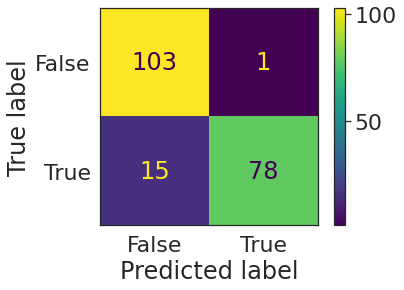

In [ ]:
pred = svm_model.predict(xte)
confusion_matrix = metrics.confusion_matrix(yte, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print('Accuracy : ', metrics.accuracy_score(pred , yte))
print('Precision : ', metrics.precision_score(yte , pred))
print('Recall : ', metrics.recall_score(yte , pred))
print('F1 : ', metrics.f1_score(yte , pred))

Accuracy :  0.9187817258883249
Precision :  0.9873417721518988
Recall :  0.8387096774193549
F1 :  0.9069767441860466


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(xtr, ytr)

LogisticRegression()

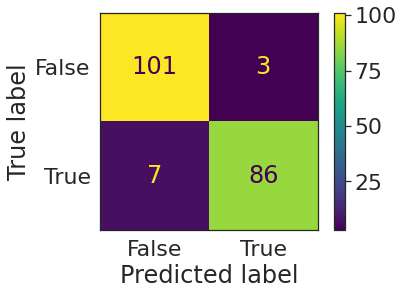

In [ ]:
pred = lr_model.predict(xte)
confusion_matrix = metrics.confusion_matrix(yte, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print('Accuracy : ', metrics.accuracy_score(pred , yte))
print('Precision : ', metrics.precision_score(yte , pred))
print('Recall : ', metrics.recall_score(yte , pred))
print('F1 : ', metrics.f1_score(yte , pred))

Accuracy :  0.949238578680203
Precision :  0.9662921348314607
Recall :  0.9247311827956989
F1 :  0.945054945054945


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(xtr, ytr)

RandomForestClassifier()

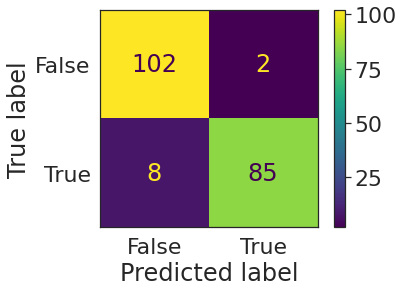

In [ ]:
pred = rf_model.predict(xte)
confusion_matrix = metrics.confusion_matrix(yte, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print('Accuracy : ', metrics.accuracy_score(pred , yte))
print('Precision : ', metrics.precision_score(yte , pred))
print('Recall : ', metrics.recall_score(yte , pred))
print('F1 : ', metrics.f1_score(yte , pred))

Accuracy :  0.949238578680203
Precision :  0.9770114942528736
Recall :  0.9139784946236559
F1 :  0.9444444444444445


###**Classification on Randomly Oversampled Dataset**

In [ ]:
x = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
train_x, train_y = ros.fit_resample(train_x, train_y)

In [ ]:
train_y.value_counts()

0    227431
1    227431
Name: Class, dtype: int64

**SVM**

In [ ]:
from sklearn import svm
from sklearn import metrics

svm_model = svm.SVC(kernel='linear')
svm_model.fit(xtr, ytr)

SVC(kernel='linear')

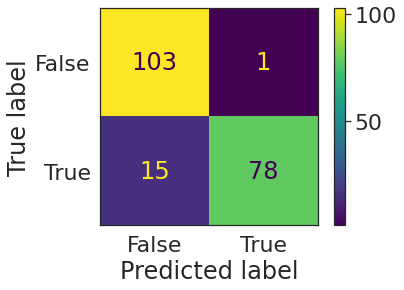

In [ ]:
pred = svm_model.predict(xte)
confusion_matrix = metrics.confusion_matrix(yte, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print('Accuracy : ', metrics.accuracy_score(pred , yte))
print('Precision : ', metrics.precision_score(yte , pred))
print('Recall : ', metrics.recall_score(yte , pred))
print('F1 : ', metrics.f1_score(yte , pred))

Accuracy :  0.9187817258883249
Precision :  0.9873417721518988
Recall :  0.8387096774193549
F1 :  0.9069767441860466


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(xtr, ytr)

LogisticRegression()

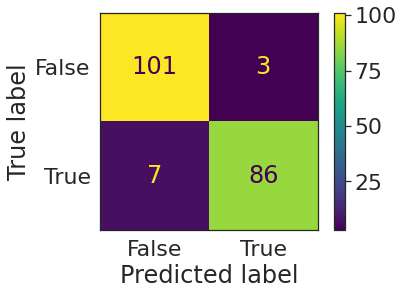

In [ ]:
pred = lr_model.predict(xte)
confusion_matrix = metrics.confusion_matrix(yte, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print('Accuracy : ', metrics.accuracy_score(pred , yte))
print('Precision : ', metrics.precision_score(yte , pred))
print('Recall : ', metrics.recall_score(yte , pred))
print('F1 : ', metrics.f1_score(yte , pred))

Accuracy :  0.949238578680203
Precision :  0.9662921348314607
Recall :  0.9247311827956989
F1 :  0.945054945054945


**Random Forest**



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(xtr, ytr)

RandomForestClassifier()

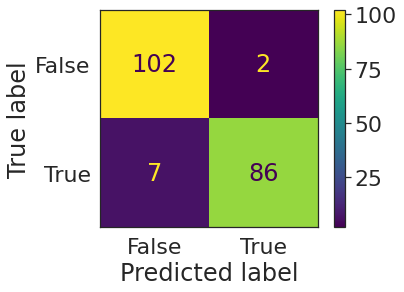

In [ ]:
pred = rf_model.predict(xte)
confusion_matrix = metrics.confusion_matrix(yte, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print('Accuracy : ', metrics.accuracy_score(pred , yte))
print('Precision : ', metrics.precision_score(yte , pred))
print('Recall : ', metrics.recall_score(yte , pred))
print('F1 : ', metrics.f1_score(yte , pred))

Accuracy :  0.9543147208121827
Precision :  0.9772727272727273
Recall :  0.9247311827956989
F1 :  0.9502762430939227


###**Classification on Oversampled Dataset using SMOTE**

In [ ]:
x = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2)

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN

smote = SMOTE(random_state=42)
train_x, train_y = smote.fit_resample(train_x, train_y)

In [ ]:
ytr.value_counts()

0    227454
1    227454
Name: Class, dtype: int64

**Support Vector Machine**

In [ ]:
from sklearn import svm
from sklearn import metrics

svm_model = svm.SVC(kernel='linear')
svm_model.fit(train_x, train_y)

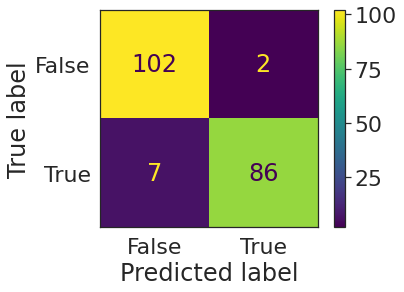

In [ ]:
pred = rf_model.predict(xte)
confusion_matrix = metrics.confusion_matrix(test_y, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print('Accuracy : ', metrics.accuracy_score(pred , test_y))
print('Precision : ', metrics.precision_score(test_y , pred))
print('Recall : ', metrics.recall_score(test_y , pred))
print('F1 : ', metrics.f1_score(test_y , pred))

Accuracy :  0.949238578680203
Precision :  0.9662921348314607
Recall :  0.9247311827956989
F1 :  0.945054945054945


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(train_x, train_y)

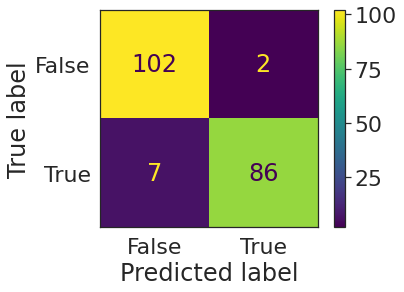

In [ ]:
pred = rf_model.predict(xte)
confusion_matrix = metrics.confusion_matrix(test_y, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print('Accuracy : ', metrics.accuracy_score(pred , yte))
print('Precision : ', metrics.precision_score(yte , pred))
print('Recall : ', metrics.recall_score(yte , pred))
print('F1 : ', metrics.f1_score(yte , pred))

Accuracy :  0.949238578680203
Precision :  0.9662921348314607
Recall :  0.9247311827956989
F1 :  0.945054945054945


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(train_x, train_y)

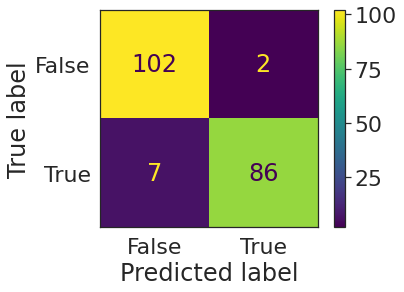

In [ ]:
pred = rf_model.predict(xte)
confusion_matrix = metrics.confusion_matrix(test_y, pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print('Accuracy : ', metrics.accuracy_score(pred , yte))
print('Precision : ', metrics.precision_score(yte , pred))
print('Recall : ', metrics.recall_score(yte , pred))
print('F1 : ', metrics.f1_score(yte , pred))

Accuracy :  0.9543147208121827
Precision :  0.9772727272727273
Recall :  0.9247311827956989
F1 :  0.9502762430939227


#Loan Defaulter prediction

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics               
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import mean_absolute_error
%matplotlib inline
from statistics import mean, stdev
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix

In [ ]:
df_loan=pd.read_csv('hmeq.csv')
df_loan.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [ ]:
print(df_loan.shape)
(df_loan.describe())

(5960, 13)


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


**Precproecessing**

In [ ]:
print(df_loan["REASON"].value_counts())
print(df_loan["JOB"].value_counts())

DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64


In [ ]:
# We can fill the missing values with the mode, i.e. "Other", or we can fill the missing values depending on the distribution of the non-null values. 
df_loan["REASON"].fillna("Other reason",inplace=True)
df_loan["JOB"].fillna(df_loan["JOB"].mode()[0],inplace=True)
df_loan["DEROG"].fillna(value=0,inplace=True)        # Filling the missing value with the mode
df_loan["DELINQ"].fillna(value=0,inplace=True)       # Filling the missing value with the mode
print(df_loan["JOB"].isna().sum())

0


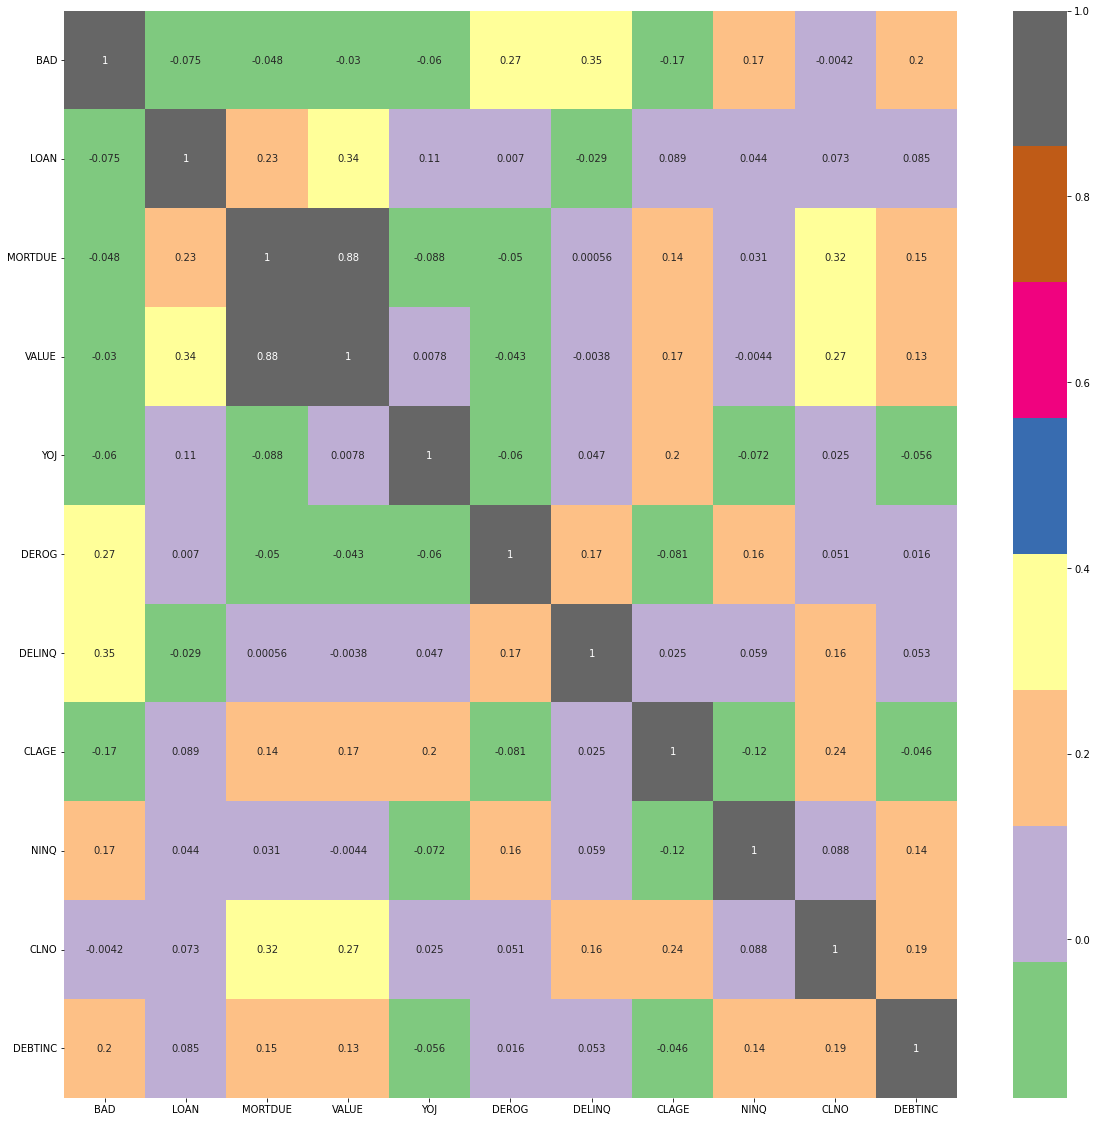

In [ ]:
plt.figure(figsize=(20,20))
heat_map = sns.heatmap(df_loan.corr(),cmap = 'Accent',annot=True)
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
# sns.color_palette("mako", as_cmap=True)
plt.show()

In [ ]:
df_loan["PROBINC"] = df_loan.MORTDUE/df_loan.DEBTINC # adding new feature, (current debt on mortgage)/(debt to income ratio)

In [ ]:
df_orig = df_loan.copy()

In [ ]:
import seaborn as sns
from scipy import stats
df_temp = df_loan.copy()
df_temp["LOAN"] = stats.yeojohnson(df_loan["LOAN"])[0]          # transforming LOAN using yeo-johnson method
df_1 = df_temp.copy()
df_temp["MORTDUE"] = np.power(df_loan["MORTDUE"],1/8)     # transforming MORTDUE by raising it to 1/8
df_temp["YOJ"] = np.log(df_loan["YOJ"]+10) 
df_temp["VALUE"] = np.log(df_loan["VALUE"]+10) 
df_temp["CLNO"] = np.log(df_loan["CLNO"]+10) 
df_2 = df_temp.copy()

In [ ]:
df_3 = df_2.copy()

In [ ]:
df_2.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,PROBINC
0,1,11.987153,3.561054,10.572214,HomeImp,Other,3.020425,0.0,0.0,94.366667,1.0,2.944439,NaN,NaN
1,1,12.443165,4.033465,11.133274,HomeImp,Other,2.833213,0.0,2.0,121.833333,0.0,3.178054,NaN,NaN
2,1,12.842515,3.283158,9.723763,HomeImp,Other,2.639057,0.0,0.0,149.466667,1.0,2.995732,NaN,NaN
3,1,12.842515,NaN,NaN,Other reason,Other,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,0,13.198540,4.205255,11.626343,HomeImp,Office,2.564949,0.0,0.0,93.333333,0.0,3.178054,NaN,NaN


In [ ]:
# df_2.drop(["HomeImp", "Other reason","Sales", "Self"],axis=1,inplace=True)

In [ ]:
# df_loan.name = 'df : original with one added feature (PROBINC)'
# df_1.name = 'df_1 : transformed just LOAN feature'
# df_2.name = 'df_2 : transformed LOAN, and other features too, and dropped other features (MORTDUE, YOJ), which seemed unimportant from the visualisation section'
# df_3.name = 'df_3 :  contains transformed features, LOAN and others (MORTDUE,YOJ, etc.)'

In [ ]:
# df_loan.name = 'df : original with one added feature (PROBINC)'
# df_1.name = 'df_1 : transformed just LOAN feature'
# df_2.name = 'df_2 : transformed LOAN, and other features too, and dropped other features (MORTDUE, YOJ), which seemed unimportant from the visualisation section'
# df_3.name = 'df_3 :  contains transformed features, LOAN and others (MORTDUE,YOJ, etc.)'

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2

In [ ]:
def preprocess(df):
  df1 = df.copy()
  # Numerosity Reduction, with a threshold of 4 null values
  df1.dropna(axis=0,thresh=4,inplace=True)
  # Filling the rest of the null values using interpolated values, mode and median
  df1.fillna(value=df1.interpolate(),inplace=True)
  df1.fillna(value=df1.mode(),inplace=True)
  df1.fillna(value=0,inplace=True)
  # Taking out the target column before using #standard scaler
  y = df["BAD"]
  df1.drop(["BAD"],axis=1,inplace=True)

  # Using Standard Scaler, as it might also take care of some outliers
  sscaler = StandardScaler()
  scaled_features = sscaler.fit_transform(df1)

  # Standard Scaler retuen a numpy array, convertig it back into a DataFrame, for ease of understanding
  scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)
  return scaled_features_df,y

def preprocess_min_max(df):
  df1 = df.copy()
  # Numerosity Reduction, with a threshold of 4 null values
  df1.dropna(axis=0,thresh=4,inplace=True)
  # Filling the rest of the null values using interpolated values, mode and median
  df1.fillna(value=df1.interpolate(),inplace=True)
  df1.fillna(value=df1.mode(),inplace=True)
  df1.fillna(value=0,inplace=True)
  # Taking out the target column before using #standard scaler
  y = df["BAD"]
  df1.drop(["BAD"],axis=1,inplace=True)

  # Using Standard Scaler, as it might also take care of some outliers
  sscaler = MinMaxScaler()
  scaled_features = sscaler.fit_transform(df1)

  # Standard Scaler retuen a numpy array, convertig it back into a DataFrame, for ease of understanding
  scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns=df1.columns)
  return scaled_features_df,y

In [ ]:
from scipy.stats import chi2

In [ ]:
df_loan.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,PROBINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,NaN
3,1,1500,NaN,NaN,Other reason,Other,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,NaN


In [ ]:
df_loan.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,PROBINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,NaN
3,1,1500,NaN,NaN,Other reason,Other,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,NaN


In [ ]:
df_loan = df_loan.join(pd.get_dummies(df_loan["JOB"]))
df_loan = df_loan.join(pd.get_dummies(df_loan["REASON"]))
df_loan.drop(["JOB","REASON"],axis=1,inplace=True)

In [ ]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_final

df3=remove_outlier_IQR(df_loan)
print("Number of outliers removed : " , df_loan.shape[0]-df3.shape[0])

Number of outliers removed :  4656


In [ ]:
def plotconfusionmatrix(y, y_pred):
    cf_matrix = confusion_matrix(y, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    plt.show()

In [ ]:
def model_analysis(model,x_test, y_true,y_pred):
    #plot_roc(y_true, y_pred)
    plotconfusionmatrix(y_true, y_pred)
    print(classification_report(y_true, y_pred))

In [ ]:
def build_and_analysis(df,models):
  scaled_features_df,y = preprocess(df)
  x_train, x_test, y_train, y_test = train_test_split(scaled_features_df,y)
  for i in models:
    model = i()
    model.fit(x_train,y_train)
    print(str(type(model)).split(".")[-1][:-2])
    print("Accuracy on Training Dataset : ",model.score(x_train,y_train))
    print("Accuracy on CV Dataset : ",model.score(x_test,y_test))
    model_analysis(model,x_test,y_test,model.predict(x_test))
    print("\n \n \n \n")

In [ ]:
# Dividing the dataset into training and cross-validation
# y = df["BAD"]
# df.drop(["BAD"],axis=1,inplace=True)
scaled_features_df,y = preprocess(df_loan)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC 
from sklearn import metrics

**SVM**

SVC
Accuracy on Training Dataset :  0.8899328859060402
Accuracy on CV Dataset :  0.8899328859060402


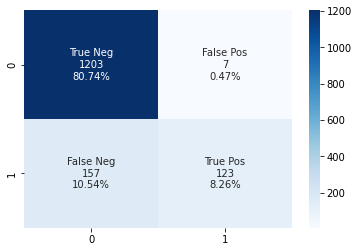

              precision    recall  f1-score   support

           0       0.88      0.99      0.94      1210
           1       0.95      0.44      0.60       280

    accuracy                           0.89      1490
   macro avg       0.92      0.72      0.77      1490
weighted avg       0.90      0.89      0.87      1490


 
 
 



In [ ]:
build_and_analysis(df_loan,[SVC])

**Logistic regression**

LogisticRegression
Accuracy on Training Dataset :  0.8373601789709172
Accuracy on CV Dataset :  0.8389261744966443


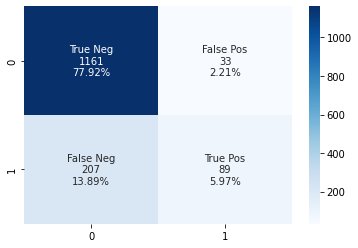

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1194
           1       0.73      0.30      0.43       296

    accuracy                           0.84      1490
   macro avg       0.79      0.64      0.67      1490
weighted avg       0.83      0.84      0.81      1490


 
 
 



In [ ]:
build_and_analysis(df_loan,[LogisticRegression])

In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Handling class imbalance

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
!pip install scikit-learn==0.23.2
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Oversampling

In [ ]:
# Instantiate the RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features_df,y)

In [ ]:
# Fit the oversampler to the training data
x1_train_resampled, y1_train_resampled = ros.fit_resample(scaled_features_df,y)

**SVM**

In [ ]:
from sklearn import svm
svc=svm.SVC() 
svc.fit(x1_train_resampled,y1_train_resampled)
y_pred=svc.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100)

Accuracy :  87.85234899328859


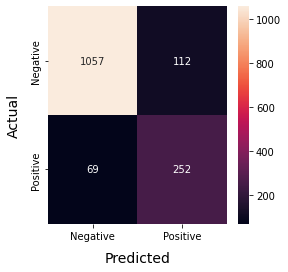

In [ ]:
import seaborn as sns
plt.figure(figsize=(4, 4))
ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set_xlabel("Predicted", fontsize=14, labelpad=10)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_ylabel("Actual", fontsize=14, labelpad=10)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

**Logistic Regression** 

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(x1_train_resampled,y1_train_resampled)
y_pred = lr_model.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100)

Accuracy :  78.85906040268456


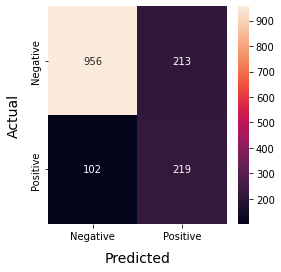

In [ ]:
import seaborn as sns
plt.figure(figsize=(4, 4))
ax = sns.heatmap(cm, annot=True, fmt='d')
ax.set_xlabel("Predicted", fontsize=14, labelpad=10)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.set_ylabel("Actual", fontsize=14, labelpad=10)
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

#UnderSampling

In [ ]:
# Instantiate the RandomUnderSampler
ros = RandomUnderSampler(random_state=42)

# Fit the oversampler to the training data
x1_train_resampled, y1_train_resampled = ros.fit_resample(scaled_features_df,y)

**SVM**

In [ ]:
from sklearn import svm
svc=svm.SVC() 
svc.fit(x1_train_resampled,y1_train_resampled)
y_pred=svc.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100)

Accuracy : 94.9916040268456


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(x1_train_resampled,y1_train_resampled)
y_pred = lr_model.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print ("Accuracy : 88.5906040268456 ", accuracy_score(y_test, y_pred)*100)

Accuracy: 88.5906040268456


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(x_train, y_train)  
y_pred = classifier.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print ("Accuracy : ", accuracy_score(y_test, y_pred)*100)

Accuracy : 90.59898697893332


**Observations**:

-> Class imbalance occurs when the number of instances in one class is significantly smaller than the number of instances in another class. This can lead to models being biased towards the majority class and having poor performance in classifying minority classes.
-> Class imbalance techniques such as oversampling, undersampling can help to mitigate this problem. Oversampling techniques increase the number of instances in the minority class, undersampling techniques decrease the number of instances in the majority class. These techniques can help to balance the distribution of the classes and improve the performance of the model.
-> In some cases, applying class imbalance techniques can result in a decrease in overall accuracy, but this may be accompanied by an increase in the accuracy of the minority class. Mostly it depends on the specific characteristics of the dataset and the modeling approach used.